# Zha et al. 2021 Models

Data from Zha et al. 2021, hadron-quark phase transition simulations of a variety of progenitors from Sukhbold et al. 2018 and the STOS EOS with B=145MeV.
  
Reference: Zha et al. ApJ 911 74 2021
- [doi:10.3847/1538-4357/abec4c](https://doi.org/10.3847/1538-4357/abec4c)
- [arXiv:2103.02268](https://arxiv.org/abs/2103.02268)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.models.ccsn import Zha_2021
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence

mpl.rc('font', size=16)
%matplotlib inline

## Initialize Models

To start, let’s see what progenitors are available for the `Zha_2021` model. We can use the `param` property to view all physics parameters and their possible values:

In [2]:
Zha_2021.param

{'progenitor_mass': <Quantity [16.  , 17.  , 18.  , 19.  , 20.  , 21.  , 22.  , 23.  , 24.  ,
            25.  , 26.  , 19.89, 22.39, 30.  , 33.  ] solMass>}

We’ll initialise two of these progenitors. If this is the first time you’re using a progenitor, snewpy will automatically download the required data files for you.

In [7]:
m19 = Zha_2021(progenitor_mass=19*u.solMass)
m19_89 = Zha_2021(progenitor_mass=19.89*u.solMass)
m17 = Zha_2021(progenitor_mass=17*u.solMass)
m19

s17.dat:   0%|          | 0.00/665k [00:00<?, ?iB/s]

**Zha_2021 Model**: s19.dat

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $19$ $\mathrm{M_{\odot}}$|
|EOS | STOS_B145 |

Finally, let’s plot the luminosity of different neutrino flavors for this model. (Note that the `Zha_2021` simulations didn’t distinguish between $\nu_x$ and $\bar{\nu}_x$, so both have the same luminosity.) We’ll also add zoomed-in plots to see the phase transition better.

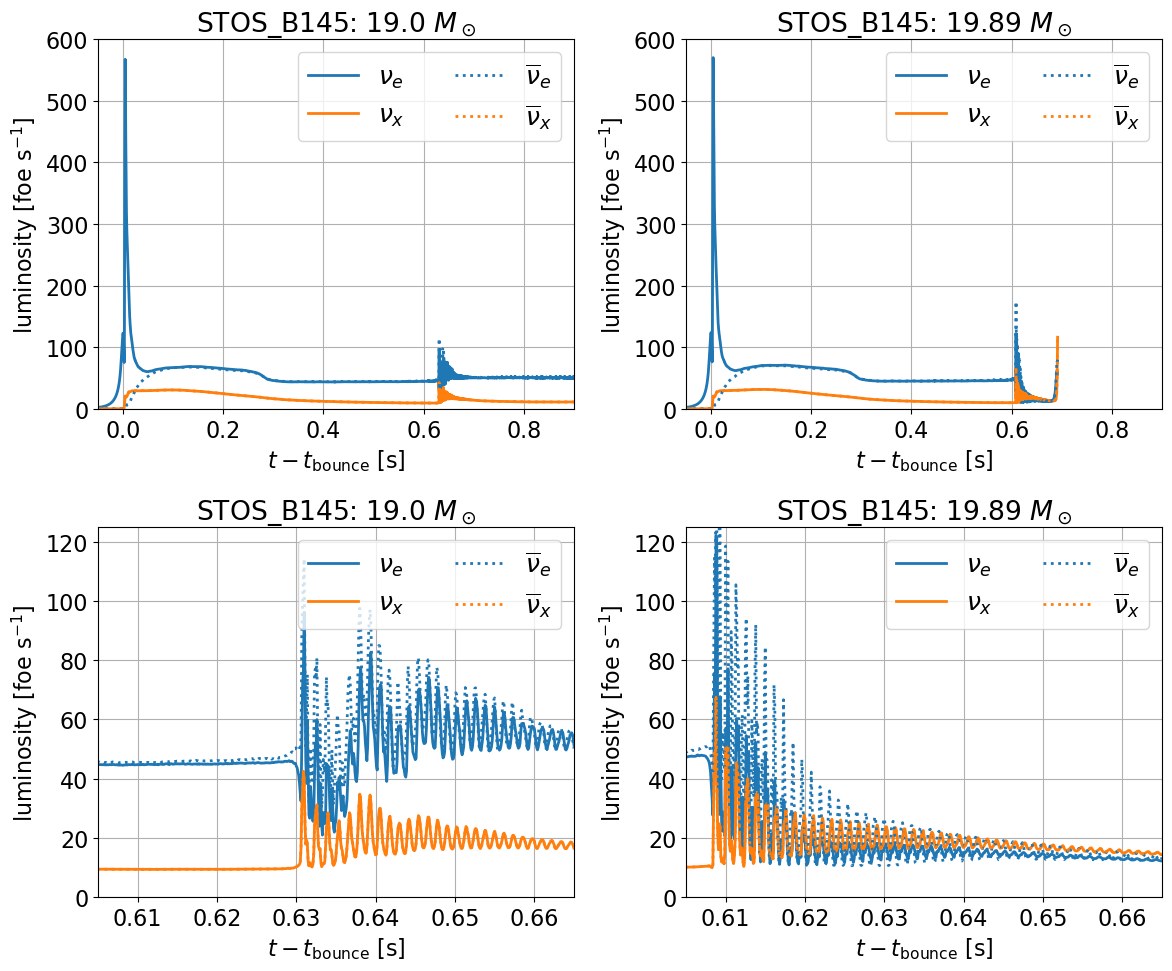

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), tight_layout=True)

for i, model in enumerate([m19, m19_89]):
    for j in range(2):
        ax = axes[j, i]
        for flavor in Flavor:
            ax.plot(model.time, model.luminosity[flavor]/1e51,  # Report luminosity in units foe/s
                    label=flavor.to_tex(),
                    color='C0' if flavor.is_electron else 'C1',
                    ls='-' if flavor.is_neutrino else ':',
                    lw=2)
        ax.set(xlim=(-0.05, 0.9) if j==0 else (0.605, 0.665),
               ylim=(0, 600) if j==0 else (0, 125),
               xlabel=r'$t-t_{\rm bounce}$ [s]',
               ylabel=r'luminosity [foe s$^{-1}$]',
               title=r'{}: {} $M_\odot$'.format(model.metadata['EOS'], model.metadata['Progenitor mass'].value))
        ax.grid()
        ax.legend(loc='upper right', ncol=2, fontsize=18)

## Initial and Oscillated Spectra

Plot the neutrino spectra at the source and after the requested flavor transformation has been applied.

### Adiabatic MSW Flavor Transformation: Normal mass ordering

In [5]:
# Adiabatic MSW effect. NMO is used by default.
xform_nmo = AdiabaticMSW()

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 400*u.ms

ispec = model.get_initial_spectra(t, E)
ospec_nmo = model.get_transformed_spectra(t, E, xform_nmo)

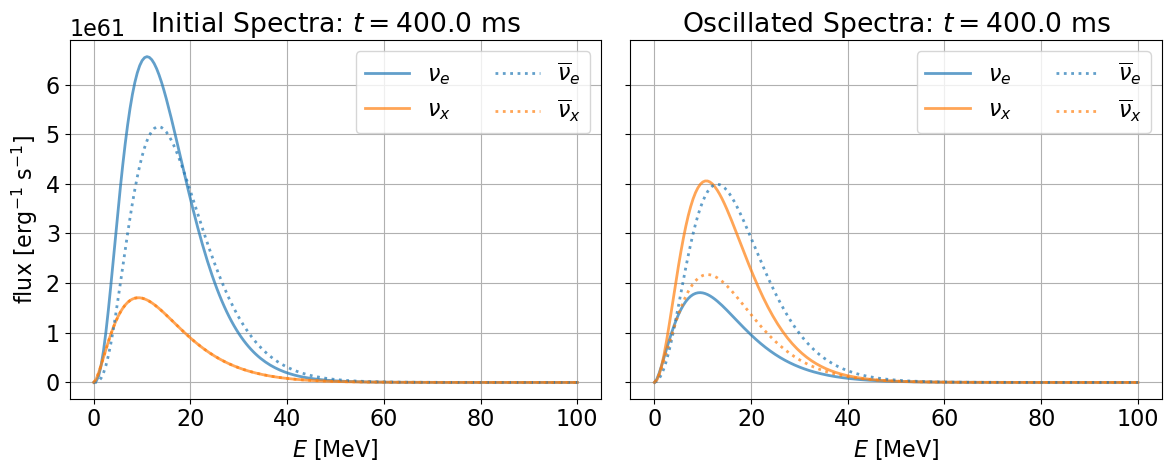

In [6]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec, ospec_nmo]):
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)

    ax.set(xlabel=r'$E$ [{}]'.format(E.unit),
           title='Initial Spectra: $t = ${:.1f}'.format(t) if i==0 else 'Oscillated Spectra: $t = ${:.1f}'.format(t))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]')

fig.tight_layout();